### Import packages

In [1]:
import pandas as pd ### for reading and modifying databases
import matplotlib.pyplot as plt ### for plotting graphs
import numpy as np ### for managing vectorized operations
from scipy.stats import iqr ### iqr function 

### Reads files

In [2]:
raw = pd.read_csv('data_augmented.csv') ### Reads the data file
raw.head() ### Preview of datafile

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5.0,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40039,39000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,9.21,1.73,0.0,0.69,46.00,1,0,10.57132,0
2,40007,140000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
3,40008,38000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
4,40010,110000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1


### Data cleaning

##### Check for null values

In [3]:
raw.isnull().sum()

id             0
price_000      2
yr_2001        2
yr_2002        2
yr_2003        2
yr_2004        2
yr_2005        2
yr_2006        2
apt            0
floor          1
age_0_10       1
age_10_20      1
age_20_more    1
num_room       1
num_bath       1
num_garage     1
area_m2        2
ses            4
pop_dens       2
pcnt_indu      1
pcnt_com       1
pcnt_insti     1
pcnt_vacant    1
pcn_green      0
homicides      0
house          0
ses_bin        0
lnprice        0
price_hi       0
dtype: int64

In [4]:
### number of observations
null_values = raw.isnull().sum(axis = 1)

num_obs = len(raw[null_values>0])

print(num_obs, len(raw))
raw[null_values>0]

9 3985


,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
1,40039,39000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,9.210,1.73,0.00,0.690,46.00,1,0,10.571320,0
12,40018,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,...,0.00,8.145,7.62,0.00,0.575,46.00,0,0,11.082143,0
50,40018,89191.5,1.0,0.0,0.0,0.0,0.0,0.0,1,3.0,...,NaN,NaN,NaN,NaN,0.140,41.06,0,0,11.398541,0
63,40197,57500.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,...,0.00,0.000,1.49,0.00,0.210,35.76,0,0,10.959540,0
107,40330,145000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,...,0.00,0.000,1.60,0.00,0.610,34.00,1,0,11.884490,1
124,40495,40000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,7.0,...,0.00,0.000,1.19,0.00,0.000,38.88,0,0,10.596630,0
477,42486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,...,0.00,4.740,0.83,0.00,0.580,46.00,1,0,11.608240,1
2523,506972,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,...,0.44,3.670,17.18,5.52,5.410,137.38,0,0,11.082140,0
3477,504693,52000.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4.0,...,53.14,0.000,1.02,3.93,0.220,234.00,0,0,10.859000,0


In [5]:
df = raw.dropna().reset_index(drop = True)
df.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1,5.0,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40007,140000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,40008,38000.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
3,40010,110000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1
4,40011,120000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1


##### Check for outliers

<img src = 'boxplots.jpg' width = 500>
source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

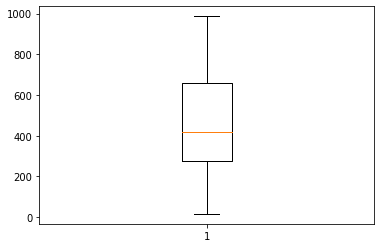

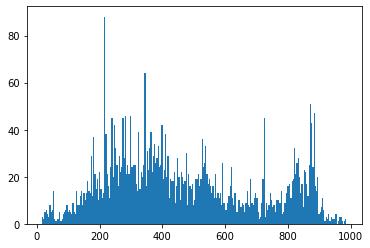

In [6]:
### Population Density
x = df['pop_dens']
plt.boxplot(x)
plt.show()
plt.hist(x, 250)
plt.show()

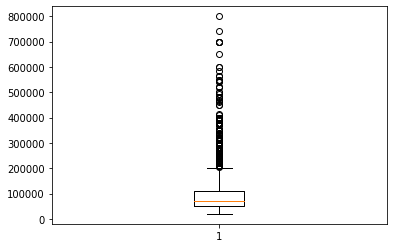

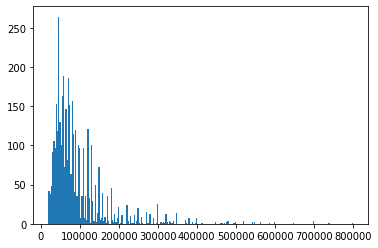

In [7]:
### Price
x = df['price_000']
plt.boxplot(x)
plt.show()
plt.hist(x, 250)
plt.show()

In [8]:
### How many observations would we be dropping?
var = df['price_000']

q_75 = np.quantile(var, 0.75)
q_25 = np.quantile(var, 0.25)
q_50 = np.quantile(var, 0.5) ### This is also the median

iqr_calc = q_75-q_25 ### This should give the same output as the function scipy.stats.iqr()
print(iqr_calc)

60000.0


In [9]:
### Find how many observations we would drop if we got rid of outliers
outliers = df[(var<(q_25-1.5*iqr_calc))|(var>(q_75+1.5*iqr_calc))]

print(len(outliers), len(df))

outliers

262 3976


,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
25,40047,240000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,10.34,11.19,0.00,0.28,46.00,1,0,12.38839,1
31,40069,350000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,0.00,0.42,0.00,1.23,34.00,1,0,12.76569,1
43,40112,245000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,6.76,4.66,0.00,1.14,45.62,1,0,12.40901,1
67,40258,210000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,...,0.00,0.00,0.00,0.00,0.67,46.00,1,0,12.25486,1
69,40277,380000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,1.65,1.27,0.00,0.26,45.08,1,0,12.84793,1
76,40317,276000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,0.00,0.00,0.00,0.00,46.00,1,0,12.52816,1
102,40429,250000.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,5.51,10.18,0.00,0.24,46.00,1,0,12.42922,1
148,40651,300000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,0.00,0.00,0.00,0.70,46.00,1,0,12.61154,1
154,40687,240000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,0.00,0.75,0.00,1.84,34.00,1,0,12.38839,1
174,40773,520000.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0.00,24.15,11.05,0.00,0.73,46.00,1,0,13.16158,1


### Personalizing Histograms

##### How many bins?

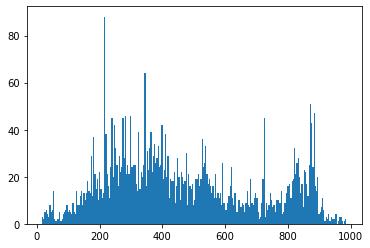

In [10]:
### Population Density
x = df['pop_dens']
n_bins = 250
plt.hist(x, n_bins)
plt.show()

##### Personalizing the plot

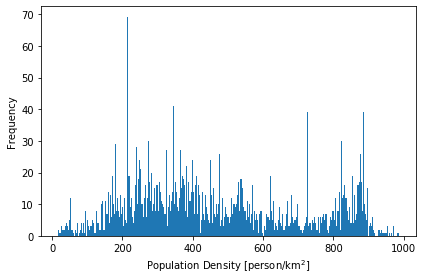

In [11]:
x = df.pop_dens  ### Defines the variable we want to plot
n_bins = 500 ### Defines the number of bins

plt.figure(figsize=(6,4)) ### Defines graph size (x,y) in inches
plt.hist(x, n_bins) ### Defines the histogram plotting function from the matplotlib library
plt.xlabel('Population Density [$\mathregular{person/km^2}]$') ### Creates the x-axis label
plt.ylabel('Frequency') ### Creates the y-axis label
plt.tight_layout() ### Adjusts labels to the figure area
plt.savefig('pop_dens_hist.jpg') ### Saves figure to project folder
plt.show() ### Plots the graph

##### Creating dummy SES variable

In [12]:
df.groupby('ses').size()

ses
1.0      26
2.0      79
3.0    2105
4.0    1448
5.0     227
6.0      91
dtype: int64

In [13]:
df['ses_dummy'] = np.where((df['ses']==5)|(df['ses']==6), 1, 0)

In [14]:
df.groupby('ses_dummy').size()

ses_dummy
0    3658
1     318
dtype: int64

##### Create binary density variable

In [15]:
pop_dens_med = np.median(df['pop_dens'])
pop_dens_med

416.32000000000005

In [16]:
df['pop_dens_dummy'] = np.where((df['pop_dens']>=pop_dens_med), 1, 0)

In [17]:
df.groupby('pop_dens_dummy').size()

pop_dens_dummy
0    1988
1    1988
dtype: int64

##### Recode the number of bathrooms variable

In [18]:
df.groupby('num_bath').size()

num_bath
1.0    1021
2.0    1776
3.0     623
4.0     444
5.0     112
dtype: int64

In [19]:
df['num_bath_cat'] = np.where((df['num_bath']>=3), 3, df['num_bath'])

##### Standardizing the Area variable

<img src = 'standarization.jpg' width = 500>
source: https://365datascience.com/standardization/

In [20]:
df['area_m2'].describe()

count    3976.000000
mean      121.662726
std        86.126627
min        22.000000
25%        62.000000
50%        86.000000
75%       151.000000
max       450.000000
Name: area_m2, dtype: float64

In [21]:
x = df['area_m2']

area_mean = np.mean(x)
area_SD = np.std(x) 

print('area mean:', round(area_mean, 2))
print('area SD:', round(area_SD, 2))

area mean: 121.66
area SD: 86.12


In [22]:
df['area_stand'] = (df['area_m2']-area_mean)/area_SD

In [23]:
x = df['area_stand']

area_std_mean = np.mean(x)
area_std_SD = np.std(x) 

print('area mean:', round(area_std_mean, 2))
print('area SD:', round(area_std_SD, 2))

area mean: 0.0
area SD: 1.0


##### Compare area histograms

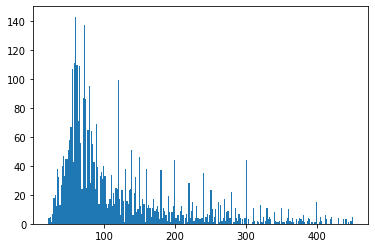

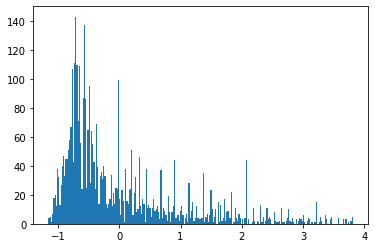

In [24]:
plt.hist(df['area_m2'], 250)
plt.show()

plt.hist(df['area_stand'], 250)
plt.show()

##### Compare density histograms

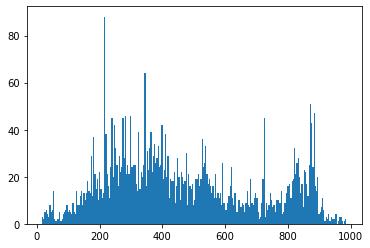

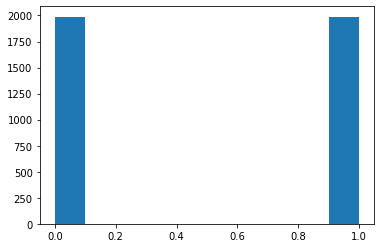

In [25]:
plt.hist(df['pop_dens'], 250)
plt.show()

plt.hist(df['pop_dens_dummy'])
plt.show()

##### Scatterplot price vs SES (6 categories)

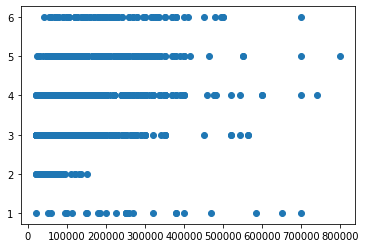

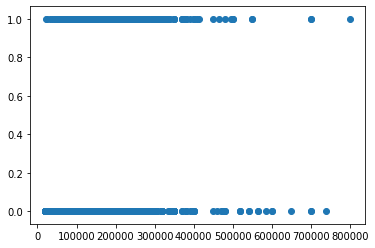

In [26]:
x = df['price_000']
y1 =  df['ses']
y2 = df['ses_dummy']
plt.scatter(x, y1)
plt.show()

plt.scatter(x, y2)
plt.show()

### Appendix

##### How to plot side by side

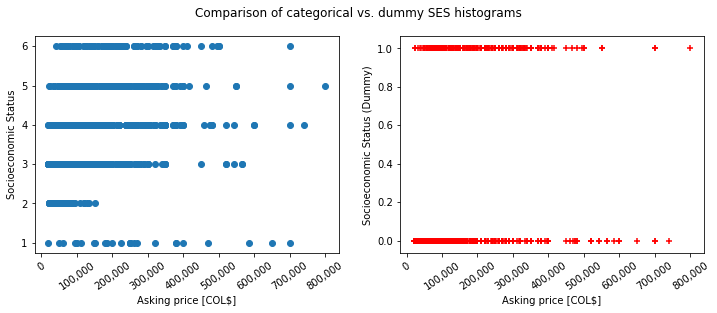

In [27]:
### Defines the number of figures that will make up the graph
### plt.subplots (n_rows, n_columns, figsize = (width, height))
### In this case, we are creating two figures side by side (1, 2)
### If we wanted two figures one on top of the other, we would do (2, 1)

### ax1 will define everything related to figure 1
### ax2 will define everything related to figure 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

### Defines the varibles that will be used for each plot
### Figure 1
x1 = df.price_000
y1 = df.ses
### Figure 2
x2 = df.price_000
y2 = df.ses_dummy

### Creates title for overall figure
plt.suptitle('Comparison of categorical vs. dummy SES histograms')

### Creates first plot
ax1.scatter(x1, y1)
ax1.set_xlabel('Asking price [COL$]')
ax1.set_ylabel('Socioeconomic Status')
### Formats y-axis number to zero decimal points
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y1, loc: "{:d}".format(int(y1))))
### Formats x-axis number to include thousands separator
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x1, loc: "{:,}".format(int(x1))))
ax1.tick_params(axis='x', labelrotation=35)### Let's rotate the labels!

### Creates second plot
ax2.scatter(x2, y2, c ='red', marker = '+') ### We can change the color and marker type
ax2.set_xlabel('Asking price [COL$]')
ax2.set_ylabel('Socioeconomic Status (Dummy)')

### Formats x-axis number to include thousands separator
ax2.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x2, loc: "{:,}".format(int(x2))))
ax2.tick_params(axis='x', labelrotation=35) ### Let's rotate the labels!

plt.show()